# ETHIC - Primavera 2024

### Código

In [1]:
import pandas as pd
import os 
import warnings

# Ignorar advertencias específicas de openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

def process_data():
    print("Casos disponibles:")
    print("1. Amanda")
    try:
        caso = int(input("Ingresar número del caso :"))
    except ValueError:
        print("Por favor ingrese un número válido.")
        return

    casos_disponibles = {1: "Amanda"}
    
    # Chequeo de opciones
    if caso not in casos_disponibles.keys():
        print("Número de caso no válido")
        return
    
    # Seleccionar caso
    caso_seleccionado = casos_disponibles[caso]
    print(f"Caso seleccionado: {caso_seleccionado}")

    # PATH a las carpetas de datos
    ANSWERS_DATA_PATH = 'data/answers/Amanda'
    FOLDERS_ANSWERS = os.listdir(ANSWERS_DATA_PATH)

    # Dataframe para almacenar los datos
    df_answers = pd.DataFrame(columns=['df', 'opt_left', 'Grup', 'Ind1', 'Ind2', 'Magnitud_Ind1_Grup', 'Magnitud_Grup_Ind2', 
                                    'Magnitud_Ind1_Ind2', 'Cambio_postura_Ind1_Grup', 'Cambio_postura_Grup_Ind2', 
                                    'Cambio_postura_Ind1_Ind2', 'Nivel_Ind1_Grup', 'Nivel_Grup_Ind2', 'Nivel_Ind1_Ind2', 
                                    'Direccion_Ind1_Grup', 'Direccion_Grup_Ind2', 'Direccion_Ind1_Ind2', 
                                    'Comentario - Ind1 - Diferencial 1', 'Comentario - Ind1 - Diferencial 2', 
                                    'Comentario - Grup - Diferencial 1', 'Comentario - Grup - Diferencial 2', 
                                    'Comentario - Ind2 - Diferencial 1', 'Comentario - Ind2 - Diferencial 2', 'agno', 'seccion'])

    # Leer archivos excel del directorio y extraer agno y seccion
    for file in FOLDERS_ANSWERS:
        parts = file.split('_')  
        if len(parts) >= 3: 
            agno = parts[1]  
            seccion = parts[-1][:-5] 
            print(f"Archivo: {file}, Año: {agno}, Sección: {seccion}")
        else:
            print(f"==== Error en extracción de año y sección para el archivo: {file} ====")
            agno = None
            seccion = None
        
        # Extracción de columnas
        df = pd.read_excel(f'{ANSWERS_DATA_PATH}/{file}', sheet_name='Datos')
        df = df[['df', 'opt_left', 'Grup', 'Ind1', 'Ind2', 'Magnitud_Ind1_Grup', 'Magnitud_Grup_Ind2', 
                'Magnitud_Ind1_Ind2', 'Cambio_postura_Ind1_Grup', 'Cambio_postura_Grup_Ind2', 
                'Cambio_postura_Ind1_Ind2', 'Nivel_Ind1_Grup', 'Nivel_Grup_Ind2', 'Nivel_Ind1_Ind2', 
                'Direccion_Ind1_Grup', 'Direccion_Grup_Ind2', 'Direccion_Ind1_Ind2', 
                'Comentario - Ind1 - Diferencial 1', 'Comentario - Ind1 - Diferencial 2', 
                'Comentario - Grup - Diferencial 1', 'Comentario - Grup - Diferencial 2', 
                'Comentario - Ind2 - Diferencial 1', 'Comentario - Ind2 - Diferencial 2']]
        
        # Añadir columnas de agno y seccion
        df['agno'] = agno
        df['seccion'] = seccion
        
        df_answers = pd.concat([df_answers, df], ignore_index=True)
    
    # Sort, fillna y convertir columnas a string
    df_answers.sort_values(by=['Grup', 'seccion', 'agno'], inplace=True)
    df_answers.fillna('', inplace=True)

    # Convertir las columnas especificadas a tipo string
    columnas_a_convertir = [
        'Comentario - Ind1 - Diferencial 1',
        'Comentario - Grup - Diferencial 1',
        'Comentario - Ind2 - Diferencial 1',
        'Comentario - Ind1 - Diferencial 2',
        'Comentario - Grup - Diferencial 2',
        'Comentario - Ind2 - Diferencial 2'
    ]

    # Convertir las columnas a string
    for columna in columnas_a_convertir:
        df_answers[columna] = df_answers[columna].astype(str)

    # Ruta para almacenar los datos procesados
    folder_path = f'processed_data/{caso_seleccionado}'

    # Verificar si la carpeta existe, y si no, crearla
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"\nCarpeta creada: {folder_path}")
    else:
        print(f"\nCarpeta ya existe: {folder_path}")

    # Guardar datos como un nuevo csv en una ruta
    df_answers.to_csv(f'processed_data/{caso_seleccionado}/answers_by_secc_{caso_seleccionado}.csv', index=False)
    print(f"Datos procesados guardados en: {folder_path}/answers_by_secc_{caso_seleccionado}.csv")

    return caso_seleccionado


def read_data(caso):
    # Leer datos procesados
    df = pd.read_csv(f'processed_data/{caso}/answers_by_secc_{caso}.csv')
    print(f"\nDatos leídos de: processed_data/{caso}/answers_by_secc_{caso}.csv")

    # diferencial 1 conserva las columnas: 'Grup', 'Comentario - Ind1 - Diferencial 1', 'Comentario - Grup - Diferencial 1', 'Comentario - Ind2 - Diferencial 1' para df=1
    df1 = df[df['df'] == 1][['Grup', 
                                    'Comentario - Ind1 - Diferencial 1', 
                                    'Comentario - Grup - Diferencial 1', 
                                    'Comentario - Ind2 - Diferencial 1', 'agno', 'seccion']]

    # diferencial 2 conserva las columnas: 'Grup', 'Comentario - Ind1 - Diferencial 2', 'Comentario - Grup - Diferencial 2', 'Comentario - Ind2 - Diferencial 2' para df=2
    df2 = df[df['df'] == 2][['Grup', 
                                    'Comentario - Ind1 - Diferencial 2', 
                                    'Comentario - Grup - Diferencial 2', 
                                    'Comentario - Ind2 - Diferencial 2', 'agno', 'seccion']]

    # Distinguir por diferenciales

    # Convertir las columnas de los dataframes a string
    col_df1 = [
        'Comentario - Ind1 - Diferencial 1',
        'Comentario - Grup - Diferencial 1',
        'Comentario - Ind2 - Diferencial 1',
    ]

    col_df2 = [
        'Comentario - Ind1 - Diferencial 2',
        'Comentario - Grup - Diferencial 2',
        'Comentario - Ind2 - Diferencial 2',
    ]

    # Convertir las columnas a string
    for col in range (len(col_df1)):
        df1[col_df1[col]] = df1[col_df1[col]].astype(str)
        df2[col_df2[col]] = df2[col_df2[col]].astype(str)

    return df1, df2

##  Selección de caso

* 1) Caso Amanda

In [2]:
from utils.extract_data import process_data
from utils.extract_data import read_data

caso = process_data()
df1, df2 = read_data(caso)

Casos disponibles:
1. Amanda


Caso seleccionado: Amanda
Archivo: Procesamient_2023_CD1201_2.xlsx, Año: 2023, Sección: 2
Archivo: Procesamient_2023_CD1201_3.xlsx, Año: 2023, Sección: 3
Archivo: Procesamient_2023_CD1201_4.xlsx, Año: 2023, Sección: 4
Archivo: Procesamient_2023_CD1201_5.xlsx, Año: 2023, Sección: 5
Archivo: Procesamient_2023_CD1201_7.xlsx, Año: 2023, Sección: 7
Archivo: Procesamient_2023_CD1201_8.xlsx, Año: 2023, Sección: 8
Archivo: Procesamient_2023_CD1201_9.xlsx, Año: 2023, Sección: 9
Archivo: Procesamient_2024_CD1100_2.xlsx, Año: 2024, Sección: 2
Archivo: Procesamient_2024_CD1100_4.xlsx, Año: 2024, Sección: 4
Archivo: Procesamient_2024_CD1100_6.xlsx, Año: 2024, Sección: 6
Archivo: Procesamient_2024_CD1100_7.xlsx, Año: 2024, Sección: 7
Archivo: Procesamient_2024_CD1100_8.xlsx, Año: 2024, Sección: 8

Carpeta ya existe: processed_data/Amanda
Datos procesados guardados en: processed_data/Amanda/answers_by_secc_Amanda.csv

Datos leídos de: processed_data/Amanda/answers_by_secc_Amanda.csv


In [2]:
df1 = df1.head(10)
df2 = df2.head(10)

## Análisis Gramatical

### Código

In [3]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analizar_dependencias(texto):
    nlp = spacy.load("es_core_news_md")
    doc = nlp(texto)
    
    total_subordinadas = 0
    for sentencia in doc.sents:
        oraciones_subordinadas = [token for token in sentencia if token.dep_ in ("acl", "advcl", "csubj", "ccomp", "xcomp")]
        total_subordinadas += len(oraciones_subordinadas)
    
    return total_subordinadas

def aplicar_dependencias_grupal(df, dif, caso, col_ind1, col_grup, col_ind2):
    # Aplicar analizar_dependencias directamente a col_ind1 y col_ind2 (en todas las filas)
    df['Ind1_d'] = df[col_ind1].apply(lambda x: analizar_dependencias(str(x)))
    df['Ind2_d'] = df[col_ind2].apply(lambda x: analizar_dependencias(str(x)))
    
    grouped = df[['Grup', 'agno', 'seccion', col_grup]].drop_duplicates(subset=['Grup', 'agno', 'seccion'])
    grouped['Grup_d'] = grouped[col_grup].apply(lambda x: analizar_dependencias(str(x)))
    df = df.merge(grouped[['Grup', 'agno', 'seccion', 'Grup_d']], 
                  on=['Grup', 'agno', 'seccion'], 
                  how='left')
    
    # Guardar datos
    df.to_csv(f"processed_data/{caso}/Tree_dependency_df{dif}.csv", index=False)

    return df

def graficar_boxplot(df1, df2, caso):
    path = f"resultados/{caso}"

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10, 5))
    plt.boxplot([
        df1['Ind1_d'], df1['Grup_d'], df1['Ind2_d'],
        df2['Ind1_d'], df2['Grup_d'], df2['Ind2_d']
    ], boxprops=dict(color='black'),
       whiskerprops=dict(color='darkblue'),
       medianprops=dict(color='red'))
    
    plt.xticks([1, 2, 3, 4, 5, 6], ['Ind1_d1', 'Grup_d1', 'Ind2_d1', 'Ind1_d2', 'Grup_d2', 'Ind2_d2'])
    plt.ylabel('Dependencias')
    plt.title('Boxplot de las dependencias encontradas', fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.savefig(f"{path}/Analisis_Gramatical_boxplot_dependencias.png", bbox_inches='tight')
    plt.close()

def crear_tabla_dependencias(df1, df2, caso):
    # Crea una tabla con los conteos de dependencias encontradas.
    path = f"resultados/{caso}"

    diferenciales = []
    for i, df in enumerate([df1, df2], start=1):
        ind1_count = (df['Ind1_d'] < df['Ind2_d']).sum()
        grup_count = (df['Grup_d'] < df['Ind2_d']).sum()
        ind2_count = (df['Ind2_d'] < df['Ind1_d']).sum()
        
        diferenciales.append([f'Diferencial {i}', 'Ind1 < Ind2', ind1_count])
        diferenciales.append([f'Diferencial {i}', 'Grup < Ind2', grup_count])
        diferenciales.append([f'Diferencial {i}', 'Ind2 < Ind1', ind2_count])

    df_table = pd.DataFrame(diferenciales, columns=['Diferencial', 'Comparación', 'Conteo'])
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    plt.savefig(f"{path}/Analisis_Gramatical_Tabla_Dependencias.png", bbox_inches='tight')
    plt.close()

def graficar_conteos(df1, df2, caso):
    # Genera gráficos de los conteos de dependencias encontradas.
    path = f"resultados/{caso}"

    diferencial_1_counts = [
        (df1['Ind1_d'] < df1['Ind2_d']).sum(),
        (df1['Grup_d'] < df1['Ind2_d']).sum(),
        (df1['Ind2_d'] < df1['Ind1_d']).sum()
    ]

    diferencial_2_counts = [
        (df2['Ind1_d'] < df2['Ind2_d']).sum(),
        (df2['Grup_d'] < df2['Ind2_d']).sum(),
        (df2['Ind2_d'] < df2['Ind1_d']).sum()
    ]

    bar_width = 0.35
    x = np.arange(len(diferencial_1_counts))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10, 5))
    bars1 = plt.bar(x - bar_width/2, diferencial_1_counts, width=bar_width, label='Diferencial 1', color='lightcoral', edgecolor='black')
    bars2 = plt.bar(x + bar_width/2, diferencial_2_counts, width=bar_width, label='Diferencial 2', color='lightblue', edgecolor='black')

    plt.ylabel('Conteo', fontsize=12)
    plt.title('Conteo de dependencias encontradas', fontsize=14, fontweight='bold')
    plt.xticks(x, ['Ind1<Ind2', 'Grup<Ind2', 'Ind2<Ind1'], fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars1 + bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

    plt.savefig(f"{path}/Analisis_Gramatical_conteo_dependencias.png", bbox_inches='tight')
    plt.close()

# Función principal que ejecuta el análisis
def ejecutar_analisis(df_diferencial_1, df_diferencial_2, caso):
    df_diferencial_1 = aplicar_dependencias_grupal(df_diferencial_1, 1, caso, 
                                                   'Comentario - Ind1 - Diferencial 1', 
                                                   'Comentario - Grup - Diferencial 1', 
                                                   'Comentario - Ind2 - Diferencial 1')
    
    df_diferencial_2 = aplicar_dependencias_grupal(df_diferencial_2, 2, caso,
                                                   'Comentario - Ind1 - Diferencial 2', 
                                                   'Comentario - Grup - Diferencial 2', 
                                                   'Comentario - Ind2 - Diferencial 2')
    return 
    
def tree_dependency_graphs(caso):
    # Leer los dato
    df_diferencial_1 = pd.read_csv(f"processed_data/{caso}/Tree_dependency_df1.csv")
    df_diferencial_2 = pd.read_csv(f"processed_data/{caso}/Tree_dependency_df2.csv")

    # Generar gráficos
    graficar_boxplot(df_diferencial_1, df_diferencial_2, caso)
    crear_tabla_dependencias(df_diferencial_1, df_diferencial_2, caso)
    graficar_conteos(df_diferencial_1, df_diferencial_2, caso)
    return

### Análisis

Se debe ejecutar la celda de ejecutar análisis solo si se desea realizar uno nuevo. De lo contrario basta con ejecutar la celda de graficar.

In [4]:
#from utils.dependency_tree import ejecutar_analisis
ejecutar_analisis(df1, df2, caso)

: 

In [ ]:
%%capture
#from utils.dependency_tree import tree_dependency_graphs
tree_dependency_graphs(caso)

## Analisis de Topicos BERT

### Entrenamiento Modelo Bert Topic

Solo es necesario ejecutarlo si se desea entrenar nuevamente al modelo con más datos.

In [2]:
from utils.bertopic_model import *

# Crear tokenizer
tokenizer = StemmerTokenizer(stem=False, lemmatize=True)

# Cargar y preprocesar comentarios
comentarios_tokenizados = cargar_y_preprocesar_comentarios(df1, df2, tokenizer)

# Entrenar modelo BERTopic
entrenar_modelo_bertopic(comentarios_tokenizados)

: 

### Tópicos BERT

Obtener los tópicos encontrados por el modelo BERT. Esta celda se debe ejecutar solo si se desea realizar un nuevo análisis. <br>
https://huggingface.co/dccuchile/patana-chilean-spanish-bert

In [8]:
from utils.bertopic_model import *
# Cargar el modelo BERTopic desde el archivo guardado
BERT_model = BERTopic.load("models/BertTopic_model")

In [9]:
# Prediccion de topicos (ejecutar si se desea realizar uha nueva)
predict_topics(BERT_model, df1, df2, caso)

In [10]:
topic_counts_resultados = contar_topicos(caso)
graficar_topicos_agrupados(topic_counts_resultados, 1, BERT_model, caso) 
graficar_topicos_agrupados(topic_counts_resultados, 2, BERT_model, caso)

Iniciando proceso para el diferencial 1...
Realizando conteo de tópicos...
Generando gráfico de Frencuencia de Tópicos por Etapa...
Gráfico generado exitosamente.
Generando gráficos de tópicos más y menos comunes...
Gráficos generados exitosamente.
Iniciando proceso para el diferencial 2...
Realizando conteo de tópicos...
Generando gráfico de Frencuencia de Tópicos por Etapa...
Gráfico generado exitosamente.
Generando gráficos de tópicos más y menos comunes...
Gráficos generados exitosamente.


## Análisis de Tópics Éticos

La celda para obtener los tópicos éticos solo debe ejecutarse si se desea realizar una nueva predicción.

In [ ]:
from utils.ethic_topics_model import predict_ethic_topic
predict_ethic_topic(df1, df2, caso)

Se obtienen gráficos de los tópicos éticos encontrados, y aquellos que son más y menos comunes. 

In [ ]:
%%capture
from utils.ethic_topics_model import procesar_y_graficar_topicos
procesar_y_graficar_topicos(caso, 1)
procesar_y_graficar_topicos(caso, 2)

## Tópicos distintos entre etapas

Análisis de cuantos topicos distintos se encuentran en las respuestas, diferenciando por etapas y por tópicos BERT y ETHIC.

In [ ]:
from utils.ethic_words import distinct_topics
distinct_topics(caso)

## Comparación de tópicos éticos entre etapas

In [ ]:
from utils.ethic_topics_model import ethic_topics_between_stages
ethic_topics_between_stages(caso)

In [ ]:
from utils.ethic_topics_model import ethic_topics_dependency_between_stages
ethic_topics_dependency_between_stages(caso)

## Nubes de palabras

In [2]:
%%capture
from utils.bertopic_model import *
from utils.wordclouds import *

stop_words_custom
tokenizer = StemmerTokenizer(stem=True, lemmatize=True)
crear_nubes_palabras(caso, df1, df2, tokenizer=tokenizer, stop_words_custom=stop_words_custom)

## Frecuencia de aparación de palabras éticas

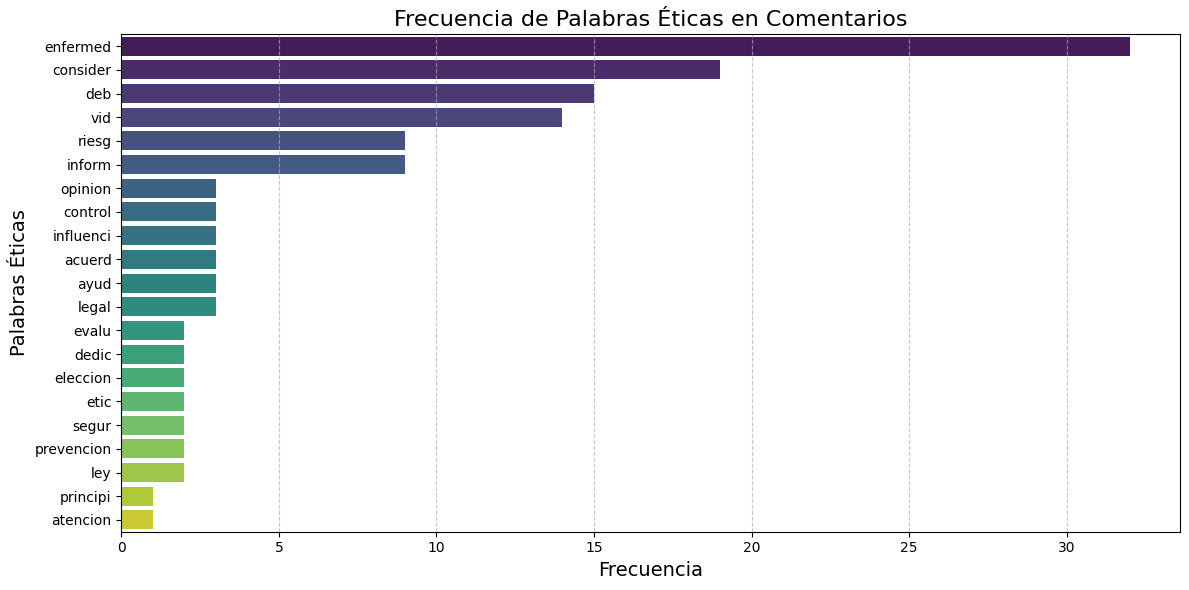

Counter({'enfermed': 32,
         'consider': 19,
         'deb': 15,
         'vid': 14,
         'riesg': 9,
         'inform': 9,
         'opinion': 3,
         'influenci': 3,
         'control': 3,
         'legal': 3,
         'acuerd': 3,
         'ayud': 3,
         'evalu': 2,
         'etic': 2,
         'eleccion': 2,
         'segur': 2,
         'ley': 2,
         'dedic': 2,
         'prevencion': 2,
         'principi': 1,
         'atencion': 1})

In [3]:
from utils.bertopic_model import *
from utils.ethic_words import *

stop_words_custom
tokenizer = StemmerTokenizer(stem=True, lemmatize=True)
contar_palabras_etica(df1, df2, tokenizer=tokenizer)

## Conectores más usados

https://huggingface.co/PlanTL-GOB-ES/roberta-large-bne-capitel-pos

In [4]:
%%capture
from utils.grammar_connectors import extract_grammar_connectors

extract_grammar_connectors(df1, df2, caso)

## Justificaciones post conectores

In [5]:
from utils.grammar_connectors import extract_keywords_after_connectors
extract_keywords_after_connectors(df1, df2, caso)

Palabras clave después de conectores guardadas en resultados/Amanda/Palabras_Clave_Despues_Conectores.csv


,Palabra Clave,Importancia
0,población,1688.580183
1,personas,1453.939553
2,enfermedad,1422.111717
3,error,1362.205344
4,exactitud,1177.672339
5,explicabilidad,947.552606
6,tuberculosis,794.257079
7,menor,731.171417
8,detectar,655.696059
9,promedio,639.595199
